<h1 style="text-align:center;">Teorija grafova</h1>

## 1. Uvod

U ovoj zadaći će ćemo definirat osnovne pojmove teorije grafova, te ćemo demonstrirati par algoritama za traženje puteva u grafu i uporediti ćemo njihove složenosti.

Jedan od najpoznatijih problema *teorije grafova* vezan je uz stari pruski grad K&ouml;nigsberg koji se nalazi na rijeci Pregel. Naime, dio grada smješten je na dva rječna otoka koji su sa sedam mostova povezani s kopnom i međusobno.

<div style="text-align: center;">
    <img src="https://www.cse.buffalo.edu/~rapaport/191/7bridges.jpg" width=400 height=400>
    <em>Slika 1.1. Tlocrt grada</em>
</div>

Građane K&ouml;nigsberga mučilo je sljedeće pitanje: "Može li se naći staza takva da prijeđemo svih 7 mostova i da svaki most prijeđemo najviše jednom?". Rješenje za navedeni problem dao je švicarski matematičar *Leonhard Euler* (1707.–1783.) 1736. godine, a time je ujedno i postavio temelje *teorije grafova*.

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Definicija 1.1.** Graf $G$ je uređeni par $G = (V, E)$, gdje je $V$ neprazan skup *vrhova*, a $E$ je skup *bridova*. Svaki brid $e \in E$ spaja dva vrha $u, v \in V$ koji se zovu *krajevi* od $e$. Brid čiji se krajevi podudaraju zove se *petlja*, a ako dva ili više brida povezuju isti par vrhova, zovu se *višestruki bridovi*.

</div>

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Definicija 1.2.** Graf je *jednostavan* ako ne sadrži ni petlje ni višestruke bridove. Graf koji sadrži višestruke bridove zove se *multigraf*.

</div>

Sada naš problem možemo prikazati pomoću sljedećeg multigrafa:
<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/K%C3%B6nigsberg_graph.svg/1280px-K%C3%B6nigsberg_graph.svg.png" width=300 height=300>
    <em>Slika 1.2. Pripadni multigraf </em>
</div>

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Definicija 1.3.** *Stupanj vrha* je broj bridova s kojima je vrh spojen.

</div>

Vidimo da u našem slučaju stupanj vrha $a$ jednak 5 (dva mosta povezuju s $b$, dva s $c$ i jedan s $d$). 

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Definicija 1.4.** *Šetnja* u grafu $G$ je naizmjeničan niz vrhova i bridova
$$ (v_{0}e_{1}v_{1}e_{2} \dots v_{k-1}e_{k}v_{k}),  $$

pri čemu je 

$$ v_{0}, v_{1}, v_{2}, \dots, v_{k} \in V, $$
$$ e_{0}, e_{1}, e_{2}, \dots, e_{k} \in E. $$

*Staza* je šetnja bez ponovljenih bridova. Ako su početak i kraj šetnje isti vrhovi, tada govorimo o *zatvorenoj šetnji.*
</div>

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Definicija 1.5.** *Eulerova staza* grafa $G$ je staza koja prolazi svakim bridom od $G$ točno jednom. *Eulerova tura* je zatvorena Eulerova staza.

</div>

<div style="text-align: center;">
    <img src="https://www.thehindu.com/children/article21247916.ece/alternates/FREE_435/26istb%20Puzzle%201%20Image",
         width=300, height=200>
    <em>Slika 1.3. Poznati primjer Eulerove staze </em>
</div>

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Teorem 1.6.** *Graf $G$* je Eulerov ako i samo ako mu je svaki vrh parnog stupnja.

</div>

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Korolar 1.7.** *Graf $G$ ima Eulerovu stazu ako i samo ako ima najviše dva vrha neparnog stupnja.*
</div>

U našem grafu imamo 4 čvora koja su neparnog stupnja, dakle iz korolara slijedi da u slučaju K&ouml;nigsberških mostova takva staza ne postoji!

## 2. Pretraživanja u širinu i dubinu
### 2.1. Pretraživanje u širinu
Sada kada smo upoznati s osnovnim pojmovima *teorije grafova* opisat ćemo dva vrlo poznata algoritma za traženje puta između dva vrha (čvora) u grafu, ali za to nam trebaju još neke definicije.

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Definicija 2.1.** *Put* je šetnja kojoj su svi vrhovi različiti.

</div>

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Definicija 2.2.** Za graf kažemo da je *povezan* ako postoji put između svaka dva vrha.

</div>


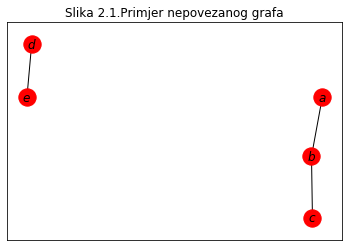

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

# inicijaliziramo graf
graf = nx.Graph()
graf.add_edges_from([(0, 1), (1, 2), (3, 4)])

# ascii vrijednosti pretvorimo u char
node_labels = { i : '$'+chr(97 + i)+'$' for i in range(0, 5) }

# crtam graf
nx.draw_networkx(graf, with_labels=True, labels=node_labels, node_color='red')
plt.title('Slika 2.1.Primjer nepovezanog grafa');

Iz primjera sa slike se lagano vidi da graf nije povezan (npr. ne postoji put između $c$ i $d$), ali kako će računalo provjeriti za zadani graf je li povezan? Ili ako je povezan možda želimo pronaći najkraći put između dva čvora? 
<br>
<br>
Jedan takav algoritam osmislio je američki profesor Edward F. Moore (1925.-2003.) za svoj problem pronalaženja najkraćeg puta za izlaz iz labirinta. Algoritam je ime *pretraživanje u širinu* ili *BFS* (*Breadth-first search*) dobio po tome što prvo pretražuje sve susjedne čvorove trenutnog čvora, a tek onda provjeri susjede susjeda trenutnog čvora, što na stablu pretraživanja izgleda kao da ide s lijeva na desno, tj. ide u širinu.

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/4/46/Animated_BFS.gif",
         width=300, height=200>
    <em>Animacija 2.2. Primjer BFSa na stablu pretraživanja  </em>
</div>

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Definicija 2.4.** *Ciklus* je šetnja u kojoj su početni i završni kraj jednaki.

</div>

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Definicija 2.5.** *Stablo* je graf koji ne sadrži cikluse.

</div>

Pošto želimo da algoritam prvo posjeti sve susjedne trenutnog čvora, a tek onda susjede susjeda, prirodno se nameće da ćemo za strukturu podataka koristiti *red* (*queue*) koja radi na principu *FIFO* (*First in, first out*). Za potrebe ove zadaće ćemo implementirati klasu *Spremnik* koju će klasa *Queue* nasljeđivati, a kasnije i *stog* (*Stack*) koji radi na principu *FILO* (*First in, last out*).
<br><br>

Algoritam je opisan sljedećim psuedokodom:
```python

def BFS(graf, početni čvor):
    Neka je q Queue
    U q dodaj početni čvor
    
    Označi početni čvor posjećenim
    
    while q nije prazan:
        Dohvati trenutni čvor s početka reda
        
        if trenutni čvor jednak ciljnom čvoru:
            return trenutni čvor
        
        for susjedni čvor in graf.susjedi(trenutni čvor):
            if susjedni čvor nije posjećen:
                Označi susjedni čvor posjećenim
                Postavi da smo u susjedni čvor došli iz trenutnog čvora
                Dodaj u q susjedni čvor

```
Kada bi željeli da nam algoritam vrati put od *početnog čvora* do *ciljnog čvora* to možemo lako dobiti tako da pratimo roditelje čvorova krenuvši od ciljnog čvora, ali tada bi dobili obrnuti poredak puta tj. dobili bi put od *ciljnog čvora* do *početnog čvora*, zato moramo dobiveni put obrnuti. To ćemo napraviti sljedećom funkcijom:
```python
def Obrni_put(početni čvor, ciljni čvor):
    Neka je s Stack
    Postavi da je trenutni čvor jednak ciljnom čvoru
    
    while trenutni čvor nije početni čvor:
        Dodaj trentuni čvor u s
        Pomakni se u roditelja od trenutnog čvora
        
    Dodaj u s početni čvor
    
    return s
```
U nastavku se nalazi implementacija *BFS* algoritma, *reda* i *stoga*, te vizualizacija algoritma za svaki njegov korak. <br>
[Skok na BFS widget](#BFS_algoritam)

In [2]:
import numpy as np
import pandas as pd

In [3]:
# inicijaliziram globalne varijable
broj_cvorova = 10
pocetni_cvor = 1
ciljni_cvor = 4

In [4]:
class Spremnik:
    def __init__(self):
        self.container = np.array([], dtype=int) 
        
    # za koristenje print(class)
    def __str__(self):
        return str(self.container)
    
    # za koristenje len(class)
    def __len__(self):
        return self.container.size
    
    # za koristenje display(class)
    def __repr__(self):
        return str(self.container)
    
    # za indeksiranje
    def __getitem__(self, index):
        return self.container[index]
    
    # vraca prvi element spremnika
    def front(self):
        return self.container[0]
    
    # brise prvi element iz spremnika i vraca ga
    def pop(self):
        val = self.container[0]
        self.container = np.delete(self.container, 0)
        return val
    
    # vraca velicinu spremnika
    def size(self):
        return self.q.size
   
    # provjerava je li red prazan
    def empty(self):
        return self.container.size == 0
    
    # vraca spremnik u obrnutom poretku
    def flip(self):
        self.container = np.flip(self.container)
        return self
    
    # provjerava postoji li element s tim keyjem
    def isin(self, val):
        return np.any(np.isin(self.container, val))

In [5]:
class Queue(Spremnik):
    # dodaje vrijednost na kraj reda
    def push(self, val):      
        self.container = np.insert(self.container, len(self.container), val)
class Stack(Spremnik):
    # dodaje vrijednost na pocetak stoga
    def push(self, val):
        self.container = np.insert(self.container, 0, val)

In [6]:
def Obrni_put(roditelj_cvora, pocetni_cvor, ciljni_cvor):
    s = Stack()
    trenutni_cvor = ciljni_cvor

    while trenutni_cvor != pocetni_cvor:
        s.push(trenutni_cvor)
        if trenutni_cvor == -1:
            return
        trenutni_cvor = roditelj_cvora[trenutni_cvor]

    s.push(trenutni_cvor)

    return s

In [7]:
def BFS(graph, pocetni_cvor, ciljni_cvor, brojac=99999):
    # deklariram i inicijaliziram spremnike za algoritam
    q = Queue()
    q.push(pocetni_cvor)

    posjeceni_cvorovi = np.zeros(len(graph), dtype=int)
    
    roditelj_cvora = np.zeros(len(graph), dtype=int)
    roditelj_cvora[pocetni_cvor] = pocetni_cvor;

    put_obilaska_stabla = Stack()
    
    # kreiram tablicu i dodajem red u nju
    tablica = pd.DataFrame([], columns=['Susjedni čvorovi', 'Trenutni čvor', 'Red', 'Lista posjećenih čvorova'])
    tablica = tablica.append(pd.Series(['-', '-', str(q), '-'], index=tablica.columns ), ignore_index=True)
    
    # algoritam staje ako je prioritetni red prazan ili za interektivni prikaz 
    # ako smo odradili zadani broj koraka
    while q.empty() == False and brojac != 0:
        trenutni_cvor = q.pop()
        posjeceni_cvorovi[pocetni_cvor] = True
        
        if trenutni_cvor == ciljni_cvor:
            # dodajem cvor u stack i dodajem red u tablicu
            put_obilaska_stabla.push(trenutni_cvor)
            
            tablica = tablica.append(pd.Series(['-', str(trenutni_cvor), '-', str(put_obilaska_stabla)], index=tablica.columns ), 
                           ignore_index=True
                          )
            
            return { 'put' : Obrni_put(roditelj_cvora, pocetni_cvor, ciljni_cvor), 
                     'put_obilaska' : put_obilaska_stabla.flip(),
                     'tablica' : tablica
                   }

        for susjedni_cvor in sorted(graph[trenutni_cvor]):
            if posjeceni_cvorovi[susjedni_cvor] == False:
                posjeceni_cvorovi[susjedni_cvor] = True
                roditelj_cvora[susjedni_cvor] = trenutni_cvor
                q.push(susjedni_cvor)

        # dodajemo redak u tablicu s podacima ako nismo bili u tom cvoru do sada
        if put_obilaska_stabla.isin(trenutni_cvor) == False:
            put_obilaska_stabla.push(trenutni_cvor)
            
            red = pd.Series([str(sorted(graph[trenutni_cvor])), str(trenutni_cvor), str(q), str(put_obilaska_stabla)], 
                            index=tablica.columns
                           )
            
            tablica = tablica.append(red, ignore_index=True)
        
        brojac = brojac - 1
    
    return {'put_obilaska' : put_obilaska_stabla.flip(),
            'tablica' : tablica
           }

In [8]:
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output

def ispisi_output_BFS():
    
    # brisem sve sto je ispisano u prijasnjem koraku
    clear_output(wait=True)
    
    # ispisujem gumbe na ekran
    display(HBox_BFS, output_BFS)

    # dohvacam podatke algoritama
    podaci_BFS = BFS(graph_BFS, pocetni_cvor, ciljni_cvor, brojac_BFS)
    
    # iscrtavam tablice
    display(podaci_BFS['tablica'])
    
    colors_BFS = [ 'yellow', 'red' ]
    
    # inicijaliziram boje cvorova za BFS
    posjeceni_BFS = np.zeros(len(graph_BFS), dtype=int)
    np.put(posjeceni_BFS, podaci_BFS['put_obilaska'], 1)
    
    node_colors_BFS = [ colors_BFS[posjeceni_BFS[i]] for i in range(len(graph_BFS)) ] 
        
    # crtam bfs graf
    nx.draw_networkx(graph_BFS, pos_graph_BFS, node_size=300, 
                     with_labels=True, node_color=node_colors_BFS)
    
    plt.title('Slika 2.3. BFS algoritam')

def generiraj_novi_graf_BFS():
    global graph_BFS
    global pos_graph_BFS
    global podaci_BFS
    global brojac_BFS
    global broj_koraka_algoritma_BFS
    
    # generiram random povezan graf
    graph_BFS = nx.generators.random_graphs.newman_watts_strogatz_graph(broj_cvorova, 3, 0.7, np.random.randint(10000))

    pos_graph_BFS = nx.shell_layout(graph_BFS)

    # dohvacam podatke algoritama
    podaci_BFS = BFS(graph_BFS, pocetni_cvor, ciljni_cvor)

    # brojac za ispisivanje tablice
    brojac_BFS = 0

    broj_koraka_algoritma_BFS = len(podaci_BFS['put_obilaska'])
    
def sljedeci_BFS_clicked(b):
    global brojac_BFS
    
    # brojac ne moze biti veci od broja koraka algoritma 
    brojac_BFS = min(brojac_BFS + 1, broj_koraka_algoritma_BFS)
        
    ispisi_output_BFS()
    return
        
def prethodni_BFS_clicked(b):
    global brojac_BFS

    # brojac ne moze biti manji od nule
    brojac_BFS = max(0, brojac_BFS - 1)
        
    ispisi_output_BFS()
    return
   
def novi_graf_BFS_clicked(b):
    generiraj_novi_graf_BFS()
    ispisi_output_BFS()
    return

# definiram gumbe
sljedeci_BFS = widgets.Button(description="Sljedeći korak")
prethodni_BFS = widgets.Button(description="Prethodni korak")
novi_graf_BFS = widgets.Button(description="Novi graf")
output_BFS = widgets.Output()
HBox_BFS = widgets.HBox([prethodni_BFS, sljedeci_BFS, novi_graf_BFS])

sljedeci_BFS.on_click(sljedeci_BFS_clicked)
prethodni_BFS.on_click(prethodni_BFS_clicked)
novi_graf_BFS.on_click(novi_graf_BFS_clicked)

<a name="BFS_algoritam"></a>

Output()

,Susjedni čvorovi,Trenutni čvor,Red,Lista posjećenih čvorova
0,-,-,[1],-


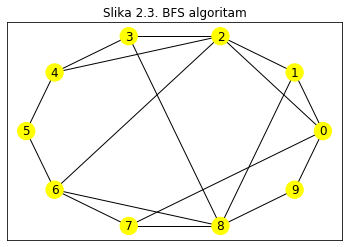

In [9]:
generiraj_novi_graf_BFS()
ispisi_output_BFS()

Sada kada smo se upoznali s radom *BFS* algoritma, opisat ćemo njegova svojstva.

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Definicija 2.6.** Za algoritam kažemo da je *potpun* ako i samo ako pronalazi rješenje uvijek kada ono postoji.

</div>

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Definicija 2.7.** Za algoritam kažemo da je *optimalan* ako i samo ako pronalazi optimalno rješenje (ono s najmanjom cijenom).

</div>

Sljedećom tablicom opisan je *BFS* algoritma:

In [10]:
stupci_tablice = ['Algoritam', 'Optimalnost', 'Potpunost', 'Prostorna složenost', 'Vremenska složenost']

# kreiram tablicu
tablica_svojstava_algoritama = pd.DataFrame([], columns=stupci_tablice)
#

# dodajem redak za BFS algoritam
red_vrijednosti = ['BFS','Da', 'Da', 
                '$\mathcal{O}(|V|) = \mathcal{O}(b^{d+1})$', 
                '$\mathcal{O}(|V|+|E|) = \mathcal{O}(b^{d+1})$']

red = pd.Series(red_vrijednosti, index=tablica_svojstava_algoritama.columns)
tablica_svojstava_algoritama = tablica_svojstava_algoritama.append(red, ignore_index=True)

display(tablica_svojstava_algoritama)

,Algoritam,Optimalnost,Potpunost,Prostorna složenost,Vremenska složenost
0,BFS,Da,Da,$\mathcal{O}(|V|) = \mathcal{O}(b^{d+1})$,$\mathcal{O}(|V|+|E|) = \mathcal{O}(b^{d+1})$


Dakle vidimo da je *BFS* algoritam potpun i optimalan. Također prostorna složenost ovisi samo o broju vrhova, dok vremenska složenost ovisi i o broju vrhova i o broju bridova. Ukoliko zapišemo složenosti u terminima $b$ i $d$, gdje je $b$ faktor grananja, a $d$ dubina optimalnog rješenja, vidimo da prostorna i vremenska složenost rastu eksponencijalno. Eksponencijalna prostorna složenost najveća je mana pretraživanja u širinu, pa se algoritam većinom primjenjuje na manje probleme.

### 2.2. Pretraživanje u dubinu

Jednu od prvih verzija algoritma *pretraživanja u dubinu* ili *DFS-a* (*Depth-first search*) istražio je u 19. stoljeću
francuski matematičar *Charles Pierre Trémaux*  (1859.–1882.) koji je također tražio algoritam za rješavanje problema pronalaska izlaska iz labirinta. Za razliku od svog 'bratskog' algoritma *BFS-a*, *DFS* istražuje, kao što samo ime kaže, u dubinu stabla obilaska. Dakle iz trenutnog čvora otići ćemo u susjedni čvor pa iz susjednog čvora u njegov susjedni čvor i tako dok ne dođemo do lista stabla. Pošto će ostali susjedni čvorovi morati 'čekati' da ih istražimo, ima smisla to što ćemo za strukturu podataka koristiti *stog* (*stack*).

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/7/7f/Depth-First-Search.gif",
         width=300, height=200>
    <em>Animacija 2.4. Pretraživanje u dubinu </em>
</div>

Algoritam je opisan sljedećim psuedokodom:
```python
def DFS_iterativni (graf, početni čvor):
    Neka je s Stack
    Dodaj u s početni čvor
    
    Označi početni čvor posjećenim
    
    while s nije prazan:
        Dohvati trenutni čvor s vrha stoga
        
        if trenutni čvor jednak ciljnom čvoru:
            return trenutni čvor
        
        if nismo bili u trenutnom čvoru:
            Označi trenutni čvor posjećenim
            
            for susjedni čvor in graf.susjedi(trenutni čvor):
                Postavi trenutni čvor za roditelja susjednog čvora
                Dodaj u s susjedni čvor
```
Također algoritam je moguće implementirati rekurzivno:
```python
def DFS_rekurzivni (graf, trenutni čvor):
    Označi trenutni čvor posjećenim
    
    if trenutni čvor jednak ciljni čvor
        return trenutni čvor
    
    for susjedni čvor in graf.susjedi(trenutni čvor):
        if susjedni čvor nije posjećen:
            DFS_rekurzivni(graf, susjedni čvor)
```
U nastavku se nalazi implementacija *DFS* algoritma, te vizualizacija algoritma za svaki njegov korak. <br>
[Skok na DFS widget](#DFS_algoritam)

In [11]:
def DFS(graph, pocetni_cvor, ciljni_cvor, brojac=99999):
    # deklariram i inicijaliziram spremnike za algoritam
    s = Stack()
    s.push(pocetni_cvor)
    
    posjeceni_cvorovi = np.zeros(len(graph), dtype=bool)
    
    roditelj_cvora = np.zeros(len(graph), dtype=int)
    roditelj_cvora[pocetni_cvor] = pocetni_cvor;
    
    put_obilaska_stabla = Stack()
    
    # kreiram tablicu i dodajem red u nju
    tablica = pd.DataFrame([], columns=['Susjedni čvorovi', 'Trenutni čvor', 'Red', 'Lista posjećenih čvorova'])
    tablica = tablica.append(pd.Series(['-', '-', str(s), '-'], index=tablica.columns ), ignore_index=True)
    
    # algoritam staje ako je prioritetni red prazan ili za interektivni prikaz 
    # ako smo odradili zadani broj koraka
    while s.empty() == False and brojac != 0:
        trenutni_cvor = s.pop()
        
        if trenutni_cvor == ciljni_cvor:
            # dodajem cvor u stack i dodajem red u tablicu
            put_obilaska_stabla.push(trenutni_cvor)
            
            red = pd.Series(['-', str(trenutni_cvor), '-', str(put_obilaska_stabla)], index=tablica.columns )
            tablica = tablica.append(red, ignore_index=True)
            
            return {'put' : Obrni_put(roditelj_cvora, pocetni_cvor, ciljni_cvor),
                    'put_obilaska' : put_obilaska_stabla.flip(),
                    'tablica' : tablica
                   }
        
        if posjeceni_cvorovi[trenutni_cvor] == False:
            posjeceni_cvorovi[trenutni_cvor] = True
            
            for susjedni_cvor in sorted(graph[trenutni_cvor], reverse = True):
                 if posjeceni_cvorovi[susjedni_cvor] == False:
                    roditelj_cvora[susjedni_cvor] = trenutni_cvor
                    s.push(susjedni_cvor)

        # dodajemo redak u tablicu s podacima ako nismo bili u tom cvoru do sada
        if put_obilaska_stabla.isin(trenutni_cvor) == False:
            put_obilaska_stabla.push(trenutni_cvor)
            
            red = pd.Series([str(sorted(graph[trenutni_cvor])), str(trenutni_cvor), 
                             str(s), str(put_obilaska_stabla)], index=tablica.columns) 
            tablica = tablica.append(red, ignore_index=True)
        
        brojac = brojac - 1
    
    return {'put_obilaska' : put_obilaska_stabla.flip(),
            'tablica' : tablica
           }

In [12]:
def ispisi_output_DFS():
    
    # brisem sve sto je ispisano u prijasnjem koraku
    clear_output(wait=True)
    
    # ispisujem gumbe na ekran
    display(HBox_DFS, output_DFS)

    # dohvacam podatke algoritama
    podaci_DFS = DFS(graph_DFS, pocetni_cvor, ciljni_cvor, brojac_DFS)
    
    # iscrtavam tablice
    display(podaci_DFS['tablica'])
    
    colors_DFS = [ 'yellow', 'red' ]
    
    # inicijaliziram boje cvorova za DFS
    posjeceni_DFS = np.zeros(len(graph_DFS), dtype=int)
    np.put(posjeceni_DFS, podaci_DFS['put_obilaska'], 1)
    
    node_colors_DFS = [ colors_DFS[posjeceni_DFS[i]] for i in range(len(graph_DFS)) ] 
        
    # crtam DFS graf
    nx.draw_networkx(graph_DFS, pos_graph_DFS, node_size=300, 
                     with_labels=True, node_color=node_colors_DFS)
    
    plt.title('Slika 2.4. DFS algoritam')

def generiraj_novi_graf_DFS():
    global graph_DFS
    global pos_graph_DFS
    global podaci_DFS
    global brojac_DFS
    global broj_koraka_algoritma_DFS
    
    # generiram random povezan graf
    graph_DFS = nx.generators.random_graphs.newman_watts_strogatz_graph(broj_cvorova, 3, 0.7, np.random.randint(10000))

    pos_graph_DFS = nx.shell_layout(graph_DFS)

    # dohvacam podatke algoritama
    podaci_DFS = DFS(graph_DFS, pocetni_cvor, ciljni_cvor)

    # brojac za ispisivanje tablice
    brojac_DFS = 0

    broj_koraka_algoritma_DFS = len(podaci_DFS['put_obilaska'])
    
def sljedeci_DFS_clicked(b):
    global brojac_DFS
    
    # brojac ne moze biti veci od broja koraka algoritma 
    brojac_DFS = min(brojac_DFS + 1, broj_koraka_algoritma_DFS)
        
    ispisi_output_DFS()
        
def prethodni_DFS_clicked(b):
    global brojac_DFS

    # brojac ne moze biti manji od nule
    brojac_DFS = max(0, brojac_DFS - 1)
        
    ispisi_output_DFS()
    
def novi_graf_DFS_clicked(b):
    generiraj_novi_graf_DFS()
    ispisi_output_DFS()
    
# definiram gumbe
sljedeci_DFS = widgets.Button(description="Sljedeći korak")
prethodni_DFS = widgets.Button(description="Prethodni korak")
novi_graf_DFS = widgets.Button(description="Novi graf")
output_DFS = widgets.Output()
HBox_DFS = widgets.HBox([prethodni_DFS, sljedeci_DFS, novi_graf_DFS])

sljedeci_DFS.on_click(sljedeci_DFS_clicked)
prethodni_DFS.on_click(prethodni_DFS_clicked)
novi_graf_DFS.on_click(novi_graf_DFS_clicked)

<a name="DFS_algoritam"></a>

Output()

,Susjedni čvorovi,Trenutni čvor,Red,Lista posjećenih čvorova
0,-,-,[1],-


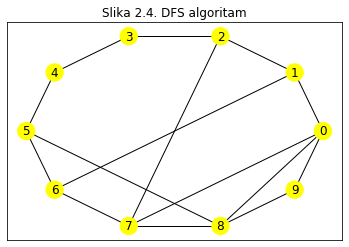

In [13]:
generiraj_novi_graf_DFS()
ispisi_output_DFS()

Kao što je *BFS* imao svoje mane, tako je teško očekivati da je *DFS* savršen. Zamislimo da stablo pretraživanja ima beskonačnu maksimalnu dubinu ili da koristimo verziju algoritma u kojem ne pamtimo čvorove koje smo posjetili, tada algoritam nikad neće završiti ili može zaglaviti u ciklusu, dakle *DFS* nije potpun. Također algoritam nije optimalan. To možemo vidjeti na sljedećem primjeru.

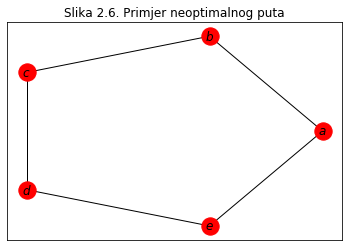

In [14]:
# inicijaliziramo graf
graf_neoptimalan = nx.Graph()
graf_neoptimalan.add_edges_from([(0, 1), (1, 2), (2, 3),  (3, 4), (0, 4)])

# postavimo labele
node_labels = { i : '$'+chr(97 + i)+'$' for i in range(5)}

# postavimo pozicije vrhovima
pos_graf_neoptimalan = nx.circular_layout(graf_neoptimalan)

#crtamo graf
nx.draw_networkx(graf_neoptimalan, pos_graf_neoptimalan, 
                 with_labels=True, labels=node_labels, node_color='red')
plt.title('Slika 2.6. Primjer neoptimalnog puta');

Pretpostavimo da imamo graf kao na gornjoj slici i zanima nas najkraći put od točke $a$ do točke $e$. Jasno je da je to put koji prolazi samo kroz vrhove $a$ i $e$, ali algoritam će vratiti put koji prolazi kroz vrhove $a$, $b$, $c$, $d$ i $e$. Proučimo još prostornu i vremensku složenost.

In [15]:
red_vrijednosti = ['DFS','Ne', 'Ne', 
                '$\mathcal{O}(|V|) = \mathcal{O}(bm)$', 
                '$\mathcal{O}(|V|+|E|) = \mathcal{O}(b^{m})$']

# dodajemo red u tablicu
red = pd.Series(red_vrijednosti, index=tablica_svojstava_algoritama.columns)
tablica_svojstava_algoritama = tablica_svojstava_algoritama.append(red, ignore_index=True)

display(tablica_svojstava_algoritama)

,Algoritam,Optimalnost,Potpunost,Prostorna složenost,Vremenska složenost
0,BFS,Da,Da,$\mathcal{O}(|V|) = \mathcal{O}(b^{d+1})$,$\mathcal{O}(|V|+|E|) = \mathcal{O}(b^{d+1})$
1,DFS,Ne,Ne,$\mathcal{O}(|V|) = \mathcal{O}(bm)$,$\mathcal{O}(|V|+|E|) = \mathcal{O}(b^{m})$


Kao i kod *BFSa*, $b$ je faktor grananja, a $m$ maksimalna dubina stabla. *DFS* algoritam treba izbjegavati kada je maksimalna dubina stabla velika ili kada trebamo optimalno rješenje.<br>
Prisjetimo se našeg problema povezanosti grafova, *DFS* će zbog manje prostorne složenosti biti bolja opcija za provjeru tog svojstva grafa!
<br><br>
Sada kada smo upoznati s oba algoritma usporedimo njihov rad!. <br>
[Skok na BFS/DFS widget](#BFS_DFS_algoritam)

In [16]:
def ispisi_output_BFS_DFS():
    
    # brisem sve sto je ispisano u prijasnjem koraku
    clear_output(wait=True)
    
    # ispisujem gumbe na ekran
    display(HBox_BFS_DFS, output_BFS_DFS)

    # dohvacam podatke algoritama
    podaci_BFS_DFS = {'BFS' : BFS(graph_BFS_DFS, pocetni_cvor, ciljni_cvor, brojac_BFS_DFS),
                      'DFS' : DFS(graph_BFS_DFS, pocetni_cvor, ciljni_cvor, brojac_BFS_DFS)
                     }
    
    # iscrtavam tablice
    print('BFS tablica podataka')
    display(podaci_BFS_DFS['BFS']['tablica'])
    print('DFS tablica podataka')
    display(podaci_BFS_DFS['DFS']['tablica'])
    
    colors_BFS_DFS = [ 'yellow', 'red' ]
    
    # inicijaliziram boje cvorova za BFS
    posjeceni_BFS = np.zeros(len(graph_BFS_DFS), dtype=int)
    np.put(posjeceni_BFS, podaci_BFS_DFS['BFS']['put_obilaska'], 1)
    
    node_colors_BFS = [ colors_BFS_DFS[posjeceni_BFS[i]] for i in range(len(graph_BFS_DFS)) ] 
    
    # inicijaliziram boje cvorova za DFS
    posjeceni_DFS = np.zeros(len(graph_BFS_DFS), dtype=int)
    np.put(posjeceni_DFS, podaci_BFS_DFS['DFS']['put_obilaska'], 1)
    
    node_colors_DFS = [ colors_BFS_DFS[posjeceni_DFS[i]] for i in range(len(graph_BFS_DFS)) ] 
    
    # crtam BFS graf
    plt.subplot(1, 2, 1)
    plt.title('BFS algoritam')
    nx.draw_networkx(graph_BFS_DFS, pos_graph_BFS_DFS, node_size=300, with_labels=True, node_color=node_colors_BFS)
    
    # crtam DFS graf
    plt.subplot(1, 2, 2)
    plt.title('DFS algoritam')
    nx.draw_networkx(graph_BFS_DFS, pos_graph_BFS_DFS, node_size=300, with_labels=True, node_color=node_colors_DFS)

def generiraj_novi_graf_BFS_DFS():
    global graph_BFS_DFS
    global pos_graph_BFS_DFS
    global podaci_BFS_DFS
    global brojac_BFS_DFS
    global broj_koraka_algoritma_BFS_DFS
    
    # generiram random povezan graf
    graph_BFS_DFS = nx.generators.random_graphs.newman_watts_strogatz_graph(broj_cvorova, 3, 0.7, np.random.randint(10000))

    pos_graph_BFS_DFS = nx.shell_layout(graph_BFS_DFS)

    # dohvacam podatke algoritama
    podaci_BFS_DFS = {'BFS' : BFS(graph_BFS_DFS, pocetni_cvor, ciljni_cvor),
                      'DFS' : DFS(graph_BFS_DFS, pocetni_cvor, ciljni_cvor)
                     }

    # brojac za ispisivanje tablice
    brojac_BFS_DFS = 0

    broj_posjecenih_cvorova_BFS = len(podaci_BFS_DFS['BFS']['put_obilaska'])
    broj_posjecenih_cvorova_DFS = len(podaci_BFS_DFS['DFS']['put_obilaska'])

    broj_koraka_algoritma_BFS_DFS = max(broj_posjecenih_cvorova_BFS, broj_posjecenih_cvorova_DFS) + 1
    
def sljedeci_BFS_DFS_clicked(b):
    global brojac_BFS_DFS
    
    # brojac ne moze biti veci od broja koraka algoritma 
    brojac_BFS_DFS = min(brojac_BFS_DFS + 1, broj_koraka_algoritma_BFS_DFS)
        
    ispisi_output_BFS_DFS()
        
def prethodni_BFS_DFS_clicked(b):
    global brojac_BFS_DFS

    # brojac ne moze biti manji od nule
    brojac_BFS_DFS = max(0, brojac_BFS_DFS - 1)
        
    ispisi_output_BFS_DFS()

def novi_graf_BFS_DFS_clicked(b):
    generiraj_novi_graf_BFS_DFS()
    ispisi_output_BFS_DFS()
    
# definiram gumbe
sljedeci_BFS_DFS = widgets.Button(description="Sljedeći korak")
prethodni_BFS_DFS = widgets.Button(description="Prethodni korak")
novi_graf_BFS_DFS = widgets.Button(description="Novi graf")
output_BFS_DFS = widgets.Output()
HBox_BFS_DFS = widgets.HBox([prethodni_BFS_DFS, sljedeci_BFS_DFS, novi_graf_BFS_DFS])

sljedeci_BFS_DFS.on_click(sljedeci_BFS_DFS_clicked)
prethodni_BFS_DFS.on_click(prethodni_BFS_DFS_clicked)
novi_graf_BFS_DFS.on_click(novi_graf_BFS_DFS_clicked)

<a name="BFS_DFS_algoritam"></a>

Output()

BFS tablica podataka


,Susjedni čvorovi,Trenutni čvor,Red,Lista posjećenih čvorova
0,-,-,[1],-
1,"[0, 2, 3, 6]",1,[0 2 3 6],[1]
2,"[1, 2, 9]",0,[2 3 6 9],[0 1]
3,"[0, 1, 3, 9]",2,[3 6 9],[2 0 1]
4,"[1, 2, 4]",3,[6 9 4],[3 2 0 1]
5,"[1, 5, 7]",6,[9 4 5 7],[6 3 2 0 1]
6,"[0, 2, 8]",9,[4 5 7 8],[9 6 3 2 0 1]
7,-,4,-,[4 9 6 3 2 0 1]


DFS tablica podataka


,Susjedni čvorovi,Trenutni čvor,Red,Lista posjećenih čvorova
0,-,-,[1],-
1,"[0, 2, 3, 6]",1,[0 2 3 6],[1]
2,"[1, 2, 9]",0,[2 9 2 3 6],[0 1]
3,"[0, 1, 3, 9]",2,[3 9 9 2 3 6],[2 0 1]
4,"[1, 2, 4]",3,[4 9 9 2 3 6],[3 2 0 1]
5,-,4,-,[4 3 2 0 1]


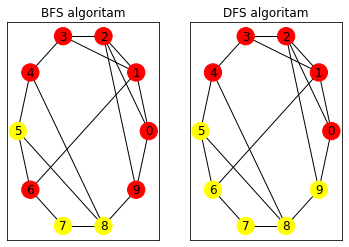

In [17]:
generiraj_novi_graf_BFS_DFS()
ispisi_output_BFS_DFS()

## 3. Dijkstrin algoritam

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Definicija 3.1.** *Težina brida e* je numerička vrijednost $w(e)$ koja se pridružuje bridu. Graf kojemu su pridrućene težine zovemo *težinski graf*.

</div>


Do sada smo pretpostavljali da je cijena prelaska iz trenutnog čvora u susjedni jednaka u cijelom grafu, zbog toga također i zanemariva. Ali što ako tražimo najjeftiniji put u težinskom grafu?

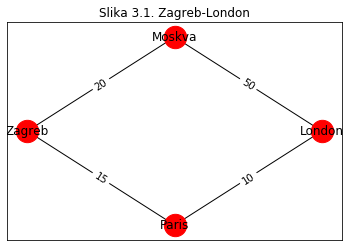

In [18]:
# inicijaliziramo graf
graf_putovanje = nx.Graph()
graf_putovanje.add_edges_from([(0, 1, {'weight' : 50}), 
                               (1, 2, {'weight' : 20}), 
                               (2, 3, {'weight' : 15}), 
                               (0, 3, {'weight' : 10})])

# ključevi su namješteni iz slike
node_labels_graf_putovanje = { 2 : 'Zagreb', 1 : 'Moskva', 3 : 'Paris', 0 : 'London'}
    
# crtam graf
pos_graf_putovanje = nx.shell_layout(graf_putovanje)
nx.draw_networkx(graf_putovanje, pos_graf_putovanje, node_size=500, 
                 with_labels=True, labels=node_labels_graf_putovanje, node_color='red')

# crtam težine
weights_graf_putovanje = nx.get_edge_attributes(graf_putovanje,'weight')
nx.draw_networkx_edge_labels(graf_putovanje, pos_graf_putovanje, edge_labels=weights_graf_putovanje);
plt.title('Slika 3.1. Zagreb-London');

Zamislimo da putujemo iz Zagreba u London i zanima nas najkraći put za stići do cilja. Sigurno nećemo vjerovat *DFS* algoritmu koji nije optimalan i putovat preko Moskve. *BFS* nam također ne mora dati optimalno rješenje. Jedan takav algoritam za traženje optimalnog puta u težinskom grafu implementirao je nizozemski znanstvenik *Edsger W. Dijkstra* (1930.-2002.) po čijem imenu algoritam i nosi ime. *Dijkstrin algoritam* u svakom koraku odabire neposjećeni susjedni vrh $u$ takav da je udaljenost od početnog vrha minimalna, te po potrebi 'poboljšava' udaljenosti svojih susjeda. Dijsktra nam osigurava da u trenutku kada stignemo u čvor za njega znamo minimalnu udaljenost koju smo do tad mogli izračunati. Kako u svakom koraku želimo dohvatiti vrh s minimalnom udaljenošću poželjno bi bilo koristiti strukturu koja ostaje sortirana dodavanjem novih elemenata. Jedna takva struktura je *prioritetni red*. Za potrebe ove zadaće implementirana je klasa *PriorityQueue* koja se ponaša dosta slično *prioritetnom redu*.
<br><br>

Algoritam je opisan sljedećim psuedokodom:
```python
def Dijkstra (graf, pocetni čvor):
    Neka je p PriorityQueue
    
    for čvor in graf.čvorovi():
        Postavi da je udaljenost čvora od početnog čvora beskonačna 
        Postavi da roditelj svakog čvora nije definiran
        Dodaj u p čvor
      
    Postavi da je udaljenost početnog čvora jednaka 0
    
    while p nije prazan:
        Neka je trenutni čvor minimalni element u p
        
        for susjedni čvor in graf.susjedi(trenutni čvor):
            Neka je nova udaljenost jednaka d(početni čvor, trenutni čvor) + d(trenutni čvor, susjedni čvor)
            
            if nova_udaljenost < d(početni čvor, trenutni čvor):
                Postavi da je udaljenost od početnog čvora do susjednog čvora jednaka novoj udaljenosti
                Postavi trenutni čvor za roditelja susjednog čvora
```
U nastavku se nalazi implementacija *Dijkstrinog algoritma*, te vizualizacija algoritma za svaki njegov korak. <br>
[Skok na Dijkstra widget](#Dijkstra_algoritam)

In [19]:
class PriorityQueue():
    def __init__(self, tip=np.dtype(np.int)): 
        self.keys = np.array([], dtype=tip) 
        self.values = np.array([], dtype=tip)
    
    # za koristenje print(class)
    def __str__(self):
        return str(np.vstack((self.keys, self.values)))
    
    # za koristenje display(class)
    def __repr__(self):
        return str(np.vstack((self.keys, self.values)))
    
    # sortira red po value vrijednosti
    def sort(self):
        mask = self.values.argsort()
        
        self.keys = self.keys[mask]
        self.values = self.values[mask]
    
    # provjerava je li red prazan
    def empty(self):
        return self.keys.size == 0
    
    # brise prvi element iz reda i vraca ga
    def pop(self):
        key = self.keys[0]
        value = self.values[0]
        
        self.keys = np.delete(self.keys, 0)
        self.values = np.delete(self.values, 0)
        return key, value
    
    # dodaje element u red
    def push(self, val):
        self.keys = np.insert(self.keys, 0, val[0])
        self.values = np.insert(self.values, 0, val[1])
        
        self.sort()
    
    # provjerava postoji li element s tim keyjem
    def isin(self, val):
        return np.any(np.isin(self.keys, val))
    
    # mijenja value za zadani key
    def set(self, key, val):
        try:
            pos = np.where(self.keys == key)[0][0]

            self.values[pos] = val
            self.sort()
        except:
            display("Element ne postoji!")

In [20]:
def Dijkstra(graph, pocetni_cvor, ciljni_cvor=-1, brojac=99999):
    
    # deklariram i inicijaliziram sve potrebne spremnike za algoritam
    udaljenosti = np.zeros(len(graph), dtype=int)
    roditelj_cvora = np.zeros(len(graph), dtype=int)
    posjeceni_cvorovi = np.zeros(len(graph), dtype=bool)
    
    roditelj_cvora[pocetni_cvor] = pocetni_cvor
    
    p = PriorityQueue()

    # dohvacam tezine
    weights_Dijkstra = nx.get_edge_attributes(graph,'weight')
    
    # kreiram tablicu
    tablica = pd.DataFrame([], columns=['Čvor', 'Posjećeni čvorovi', 'Minimalna cijena puta', 'Put do čvora'])
    
    # inicijaliziram potrebne spremnike i dodajem za svaki cvor red u tablicu
    for cvor in graph.nodes:
        # promjeni ovo kasnije
        udaljenosti[cvor] = 99999
        roditelj_cvora[cvor] = -1
            
        p.push((cvor, udaljenosti[cvor]))
        
        # red koji cu dodat u tablicu
        red = pd.Series([cvor, posjeceni_cvorovi[cvor], udaljenosti[cvor], roditelj_cvora[cvor]], 
                        index=tablica.columns 
                       )
        tablica = tablica.append(red, ignore_index=True)    
    
    p.set(pocetni_cvor, 0)
    udaljenosti[pocetni_cvor] = 0
    tablica.at[pocetni_cvor, 'Minimalna cijena puta'] = 0
    tablica.at[pocetni_cvor, 'Put do čvora'] = pocetni_cvor
    
    # algoritam staje ako je prioritetni red prazan ili za interektivni prikaz 
    # ako smo odradili zadani broj koraka
    while p.empty() == False and brojac != 0:
        trenutni_cvor, value = p.pop()
        
        posjeceni_cvorovi[trenutni_cvor] = True
        
        # postavimo u tablici da je cvor posjecen
        tablica.at[trenutni_cvor, 'Posjećeni čvorovi'] = posjeceni_cvorovi[trenutni_cvor]
        
        for susjedni_cvor in sorted(graph[trenutni_cvor]):
            
            # graph[cvor] nije simetricna relacija
            # npr. imam (0, 1) ali nemam (1, 0), pa ovako izbjegavam pristup necemu sto nije definirano
            u = min(trenutni_cvor, susjedni_cvor)
            v = max(trenutni_cvor, susjedni_cvor)
            
            nova_udaljenost = udaljenosti[trenutni_cvor] + weights_Dijkstra[u, v]
            if nova_udaljenost < udaljenosti[susjedni_cvor]:
                
                udaljenosti[susjedni_cvor] = nova_udaljenost
                roditelj_cvora[susjedni_cvor] = trenutni_cvor
                
                # azuriram tablicu
                tablica.at[susjedni_cvor, 'Minimalna cijena puta'] = udaljenosti[susjedni_cvor]
                tablica.at[susjedni_cvor, 'Put do čvora'] = trenutni_cvor
                
                p.set(susjedni_cvor, nova_udaljenost)
            
        brojac = brojac - 1
      
    # ako pozivamo funkciju preko gumb eventa, ne izračuna do kraja i ne može obrnuti put
    dict_Dijkstra = {'udaljenosti' : udaljenosti, 
                     'roditelj_cvora' : roditelj_cvora, 
                     'tablica' : tablica
                    }
    
    if ciljni_cvor != -1:
        dict_Dijkstra['put'] = Obrni_put(roditelj_cvora, pocetni_cvor, ciljni_cvor)
    
    return {'udaljenosti' : udaljenosti, 
             'roditelj_cvora' : roditelj_cvora, 
             'tablica' : tablica,
             'put' : Obrni_put(roditelj_cvora, pocetni_cvor, ciljni_cvor)
            }


In [21]:
def ispisi_output_Dijkstra():

    # pobrisem sve sto je ispisano u prijasnjem koraku
    clear_output(wait=True)
    
    # ispisem gumbe na ekran
    display(HBox_Dijkstra, output_Dijkstra)
    
    print('Najjeftiniji put: ')
    display(najkraci_put_Dijkstra)
    
    # algoritam odraduje odredeni broj koraka
    podaci_Dijkstra = Dijkstra(graph_Dijkstra, pocetni_cvor, ciljni_cvor, brojac_Dijkstra)
    display(podaci_Dijkstra['tablica'])
    
    # u cvorove upisujem do sad izracunatu udaljenost od pocetnog cvora
    cijene_Dijkstra = podaci_Dijkstra['tablica']['Minimalna cijena puta']
    labels_map_Dijkstra = { i : str(i)+'\n'+str(cijene_Dijkstra[i]) for i in range(len(graph_Dijkstra)) }
    
    # postavljam boje za cvorove
    colors_Dijkstra = ['yellow', 'red']
    posjeceni_Dijkstra = podaci_Dijkstra['tablica']['Posjećeni čvorovi']
    node_colors_Dijkstra = [ colors_Dijkstra[int(posjeceni_Dijkstra[i])] for i in range(len(graph_Dijkstra))]
    
    # crtam graf
    nx.draw_networkx(graph_Dijkstra, pos_graph_Dijkstra, node_size=500, 
            with_labels=True, labels=labels_map_Dijkstra, node_color=node_colors_Dijkstra)
    nx.draw_networkx_edge_labels(graph_Dijkstra, pos_graph_Dijkstra, edge_labels=weights_Dijkstra);
    plt.title('Slika 3.2. Dijsktrin algoritam')
    
def generiraj_novi_graf_Dijkstra():
    global graph_Dijkstra
    global pos_graph_Dijkstra
    global weights_Dijkstra
    global brojac_Dijkstra
    global najkraci_put_Dijkstra
    
    # generiram random povezan graf
    graph_Dijkstra = nx.generators.random_graphs.newman_watts_strogatz_graph(broj_cvorova, 3, 0.4, np.random.randint(10000))

    # odredim težine
    for (u, v, w) in graph_Dijkstra.edges(data=True):
        w['weight'] = np.random.randint(1, 15)

    # podaci za graf
    pos_graph_Dijkstra = nx.shell_layout(graph_Dijkstra)
    weights_Dijkstra = nx.get_edge_attributes(graph_Dijkstra,'weight')

    # brojac za algoritam
    brojac_Dijkstra = 0;
    najkraci_put_Dijkstra = Dijkstra(graph_Dijkstra, pocetni_cvor, ciljni_cvor)['put']
    
def sljedeci_Dijkstra_clicked(b):
    global brojac_Dijkstra
    
    # brojac ne moze biti veci od broja koraka algoritma    
    brojac_Dijkstra = min(brojac_Dijkstra + 1, len(graph_Dijkstra))
        
    ispisi_output_Dijkstra()
        
def prethodni_Dijkstra_clicked(b):
    global brojac_Dijkstra
      
    # brojac ne moze biti manji od nule
    brojac_Dijkstra = max(0, brojac_Dijkstra - 1)
        
    ispisi_output_Dijkstra()

def novi_graf_Dijkstra_clicked(b):
    generiraj_novi_graf_Dijkstra()
    ispisi_output_Dijkstra()
    
# definiram gumbe
sljedeci_Dijkstra = widgets.Button(description="Sljedeći korak")
prethodni_Dijkstra = widgets.Button(description="Prethodni korak")
novi_graf_Dijkstra = widgets.Button(description="Novi graf")
output_Dijkstra = widgets.Output()
HBox_Dijkstra = widgets.HBox([prethodni_Dijkstra, sljedeci_Dijkstra, novi_graf_Dijkstra])

# gumbima zadajem funkcije koje ce se izvrsiti na event
sljedeci_Dijkstra.on_click(sljedeci_Dijkstra_clicked)
prethodni_Dijkstra.on_click(prethodni_Dijkstra_clicked)
novi_graf_Dijkstra.on_click(novi_graf_Dijkstra_clicked)

<a name="Dijkstra_algoritam"></a>

Output()

Najjeftiniji put: 


[1 2 3 4]

,Čvor,Posjećeni čvorovi,Minimalna cijena puta,Put do čvora
0,0,True,2,1
1,1,True,0,1
2,2,True,2,1
3,3,True,5,2
4,4,True,10,3
5,5,True,11,4
6,6,False,13,0
7,7,True,9,2
8,8,True,11,9
9,9,True,3,0


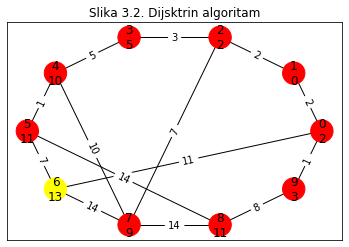

In [22]:
generiraj_novi_graf_Dijkstra()
#ispis koraka
ispisi_output_Dijkstra()

Algoritam je potpun i optimalan za pozitivne vrijednosti težina. Preostaje nam još usporediti ga s do sad spomenutim algoritmima.

In [23]:
red_vrijednosti = ['Dijkstra','Da', 'Da', 
                '$\mathcal{O}(|V^2|)$', 
                '$\mathcal{O}(|E|+|V|\log|V|) $']

# dodajemo red u tablicu
red = pd.Series(red_vrijednosti, index=tablica_svojstava_algoritama.columns)
tablica_svojstava_algoritama = tablica_svojstava_algoritama.append(red, ignore_index=True)

display(tablica_svojstava_algoritama)

,Algoritam,Optimalnost,Potpunost,Prostorna složenost,Vremenska složenost
0,BFS,Da,Da,$\mathcal{O}(|V|) = \mathcal{O}(b^{d+1})$,$\mathcal{O}(|V|+|E|) = \mathcal{O}(b^{d+1})$
1,DFS,Ne,Ne,$\mathcal{O}(|V|) = \mathcal{O}(bm)$,$\mathcal{O}(|V|+|E|) = \mathcal{O}(b^{m})$
2,Dijkstra,Da,Da,$\mathcal{O}(|V^2|)$,$\mathcal{O}(|E|+|V|\log|V|) $


## 4. Heurističko pretraživanje
### 4.1. Heuristika
Vidjeli smo kako Dijsktrin algoritam funkcionira i da će nam za pozitivne vrijednosti težina uvijek dati najjeftiniji put od početnog do ciljnog čvora. Ali može nas zasmetati činjenica da u svakom koraku odabire čvor koji se čini najbliže cilju, ne uzimajući u obzir ukupnu daljinu. Takve algoritme zovemo *pohlepnim algoritmima*. <br>

Često nam ne treba baš najkraći put do cilja, možda možemo naći neki put koji nije puno dulji od najkraćeg, ali smo ga našli u puno kraćem vremenu. 

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Definicija 4.1.** *Heuristika* je postupak koji vodi prema otkriću ili ga potiće. *Heuristička funkcija* $h\colon S\to \mathbb{R^+}$ pridjeljuje svakom stanju $s \in S$ procjenu udaljenosti od tog stanja do ciljnog stanja.

</div>

<div style="background-color:Beige; padding: 5px 5px; margin: 10px 0px;">
    
**Definicija 4.2.** Za heursitiku $h$ kažemo da je *optimistična* ili *dopustiva* ako nikad ne precjenjuje, tj. nikad nije veća od prave cijene do cilja:

$$ (\forall s \in S) \text{  } h(s) \leq h^*(s)  $$

gdje je $h^*(s)$ prava cijena od stanja $s$ do cilja.

</div>

Sada se naravno postavlja pitanje kako za problem odabrati dobru heuristiku? Pokazat ćemo par dobro poznatih heuristika za kretanje po nekoj zadanoj mreži.

U ovisnosti o dozvoljenim smjerovima kretanja imamo:
- Na pravokutnoj mreži (npr. koordinatni sustav) gdje nam je dozvoljena kretnja u 4 smjera (gore, dolje, lijevo, desno) treba  koristiti tzv. *Manhattan udaljenost* ($L_1$).
```python
def Manhattan_udaljenost (trenutni_cvor):
    dx = abs(trenutni_cvor.x - cilj.x)
    dy = abs(trenutni_cvor.y - cilj.y)
    return D * (dx + dy)
```
gdje je $D$ konstanta koju uzimamo proizvoljno, po mogučnosti takvu da nam heuristika bude dopustiva.
- Na pravokutnoj mreži gdje nam je dozvoljena kretnja u 8 smjerova (dozvoljeno i dijagonalno kretanje) treba koristiti *dijagonalnu udaljenost* ($L_{\infty}$).
```python
def Dijagonalna_udaljenost (trenutni_cvor):
    dx = abs(trenutni_cvor.x - cilj.x)
    dy = abs(trenutni_cvor.y - cilj.y)
    return D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)
```
gdje su $D$ i $D_2$ konstante koje uzimamo proizvoljno.

- Na pravokutnoj mreži gdje nam je dozvoljena kretnja u svim smjerovima može se korisiti Euklidska udaljenost ($L_2$).

- Na šesterokutnoj (hexagon) mreži gdje nam je dozvoljena kretnja u 6 smjerova treba koristiit Manhattan udaljenost prilagođenu za šesterokutnu mrežu.

### 4.2. A* algoritam
Želja nam je malo popraviti Dijkstrin algoritam tako da u svakom koraku odaberemo čvor čija će ukupna udaljenost do cilja biti najmanja. Naravno često ne možemo točno znati koliko je čvor udaljen do cilja, ali možemo procjeniti i tu će nam pomoći heuristika. Neka je $h$ heuristika, u svakom koraku uzimati ćemo čvor čiji je zbroj udaljenosti od početnog čvora do trenutnog čvora i procjenjene udaljenosti od trenutnog čvora do ciljnog čvora ($h(čvor)$) najmanji. Opisani algoritam zove se *$A^*$ algoritam* i jedan je od najprimjenjenih algoritama kod problema traženja najkraćeg puta.

Algoritam je opisan sljedećim psuedokodom:
```python
def A_star (graf, početni čvor, heuristika):
    Neka je p PriorityQueue
    
    for čvor in graf.čvorovi():
        Postavi da je najmanja udaljenost od početnog čvora do čvora jednaka beskonačno
        Postavi da je ukupna udaljenost od čvora do ciljnog čvora jednaka beskonačno

        
    Dodaj početni čvor u p
    
    while p nije prazan:
        Neka je trenutni čvor element iz p čija je ukupna udaljenost najmanja 
        
        if trenutni čvor == ciljni čvor:
            return ciljni čvor
        
        for susjedni čvor in graf.susjedi(trenutni čvor):
            Neka je nova udaljenost jednaka d(početni čvor, trenutni čvor + d(trenutni čvor, susjedni čvor)
            
            if nova_udaljenost < d(početni čvor, trenutni čvor):
                Postavi da je udaljenost od početnog čvora do susjednog čvora jednaka novoj udaljenosti
                Postavi trenutni čvor za roditelja susjednog čvora
                
                Postavi da je ukupna udaljenost jednaka zbroju d(početni čvor, susjedni čvor) + h(susjedni čvor)
                
                if q ne sadrži susjedni čvor:
                    Dodaj susjedni čvor u p                                
```

Vidimo da ako je heuristika $h(x)=0$ da upravo dobivamo Dijkstrin algoritam!

U nastavku se nalazi implementacija *$A^*$ algoritma*, te vizualizacija algoritma za svaki njegov korak. <br>
[Skok na A_star widget](#A_star_algoritam)

In [24]:
def A_star(graph, pocetni_cvor, ciljni_cvor, h, brojac=9999):   
    # deklariram i inicijaliziram sve potrebne spremnike za algoritam
    h_val = [ h(pos_graph_A_star[i], pos_graph_A_star[ciljni_cvor]) for i in range(len(graph)) ]
    
    p = PriorityQueue()
    p.push((pocetni_cvor, h_val[pocetni_cvor]))
    
    posjeceni_cvorovi = np.zeros(len(graph), dtype=bool)
    
    roditelj_cvora = np.zeros(len(graph), dtype=int)
    roditelj_cvora[pocetni_cvor] = pocetni_cvor
        
    najkraca_udaljenost = np.zeros(len(graph), dtype=int)
    ukupna_udaljenost = np.zeros(len(graph), dtype=float)
    
    for cvor in graph.nodes:
        najkraca_udaljenost[cvor] = 99999
        ukupna_udaljenost[cvor] = 99999
    
    najkraca_udaljenost[pocetni_cvor] = 0
    ukupna_udaljenost[pocetni_cvor] = najkraca_udaljenost[pocetni_cvor] + h_val[pocetni_cvor]

    # dohvacam tezine i inicijaliziram brojac koji ce mi kasnije trebati za interaktivni prikaz
    weights_A_star = nx.get_edge_attributes(graph, 'weight')
    broj_koraka_algoritma = 0
    
    # kreiram tablicu
    tablica = pd.DataFrame([], columns=['Čvor', 'Posjećeni čvorovi', 'Najmanja udaljenost', 
                                        'Heuristika', 'Ukupna udaljenost', 'Roditelj čvora'])
    
    # inicijaliziram potrebne spremnike i dodajem za svaki cvor red u tablicu
    for cvor in graph.nodes:
        if cvor != pocetni_cvor:
            najkraca_udaljenost[cvor] = 99999
            ukupna_udaljenost[cvor] = 99999
            roditelj_cvora[cvor] = -1
        
        # red koji cu dodati u tablicu
        red = pd.Series([cvor, 
                         posjeceni_cvorovi[cvor], 
                         najkraca_udaljenost[cvor], 
                         h_val[cvor], 
                         ukupna_udaljenost[cvor], 
                         roditelj_cvora[cvor]], index=tablica.columns 
                       )
        
        # dodajem u tablicu red
        tablica = tablica.append(red, ignore_index=True) 
    
    # algoritam staje ako je prioritetni red prazan ili za interektivni prikaz 
    # ako smo odradili zadani broj koraka
    while p.empty() == False and brojac != 0:
        trenutni_cvor, value = p.pop()
        posjeceni_cvorovi[trenutni_cvor] = True
        
        # azuriram tablicu 
        tablica.at[trenutni_cvor, 'Posjećeni čvorovi'] = posjeceni_cvorovi[trenutni_cvor]
        
        broj_koraka_algoritma = broj_koraka_algoritma + 1
        
        if trenutni_cvor == ciljni_cvor:
            return {'broj_koraka_algoritma' : broj_koraka_algoritma,
                    'put' : Obrni_put(roditelj_cvora, pocetni_cvor, ciljni_cvor),
                    'tablica' : tablica 
                   }
        
        for susjedni_cvor in sorted(graph[trenutni_cvor]):
            
            # graph[cvor] nije simetricna relacija
            # npr. imam (0, 1) ali nemam (1, 0), pa ovako izbjegavam pristup necemu sto nije definirano
            u = min(trenutni_cvor, susjedni_cvor)
            v = max(trenutni_cvor, susjedni_cvor)
            
            nova_udaljenost = najkraca_udaljenost[trenutni_cvor] + weights_A_star[u, v]
            if nova_udaljenost < najkraca_udaljenost[susjedni_cvor]:
                
                roditelj_cvora[susjedni_cvor] = trenutni_cvor

                najkraca_udaljenost[susjedni_cvor] = nova_udaljenost
                ukupna_udaljenost[susjedni_cvor] = nova_udaljenost + h_val[susjedni_cvor]
                
                # azuriram tablicu
                tablica.at[susjedni_cvor, 'Roditelj čvora'] = roditelj_cvora[susjedni_cvor]
                tablica.at[susjedni_cvor, 'Najmanja udaljenost'] = najkraca_udaljenost[susjedni_cvor]
                tablica.at[susjedni_cvor, 'Ukupna udaljenost'] = ukupna_udaljenost[susjedni_cvor]
                
                if posjeceni_cvorovi[susjedni_cvor] == False:
                    p.push((susjedni_cvor, ukupna_udaljenost[susjedni_cvor]))
                    
        brojac = brojac - 1

    # ne vracam najkraci put jer nije izracunat!
    return {'broj_koraka_algoritma' : broj_koraka_algoritma, 
            'tablica' : tablica 
           }

In [25]:
def ispisi_output_A_star():    
    # brisem sve sto je ispisano u prijasnjem koraku
    clear_output(wait=True)
    
    # ispisujem gumbe na ekran
    display(HBox_A_star, output_A_star)
    print('Najjeftiniji put: ')
    display(najkraci_put_A_star)
    
    # algoritam odraduje odreden broj koraka
    podaci_A_star = A_star(graph_A_star, pocetni_cvor, ciljni_cvor, h, brojac_A_star);
    display(podaci_A_star['tablica'])
    
    # postavljam boje za cvorove
    colors_A_star = ['yellow', 'red']
    posjeceni_A_star = podaci_A_star['tablica']['Posjećeni čvorovi']
    node_colors_A_star = [ colors_A_star[int(posjeceni_A_star[i])] for i in range(len(graph_A_star))]
    
    # definiram labele, u cvoru ce pisat vrijednost heuristike i ime čvora
    labels_map_A_star = {i : format(h(pos_graph_A_star[i], pos_graph_A_star[ciljni_cvor]), '.2f')+"\n"+str(i) 
                    for i in range(len(graph_A_star))}
    
    # crtam graf
    nx.draw_networkx(graph_A_star, pos_graph_A_star, node_size=500, 
                     with_labels=True, labels=labels_map_A_star, node_color=node_colors_A_star)
    nx.draw_networkx_edge_labels(graph_A_star, pos_graph_A_star, edge_labels=weights_A_star);
    plt.title('Slika 4.1. A* algoritam')

def generiraj_novi_graf_A_star():
    global graph_A_star
    global h
    global weights_A_star
    global pos_graph_A_star
    global broj_koraka_algoritma_A_star
    global najkraci_put_A_star
    global brojac_A_star
    
    # generiram random povezan graf
    graph_A_star = nx.generators.random_graphs.newman_watts_strogatz_graph(broj_cvorova, 3, 0.7, np.random.randint(10000))

    # definiram heuristiku
    alfa = 7
    h = lambda a, b : np.linalg.norm(b - a) * alfa

    # dodajem tezine
    for (u, v, w) in graph_A_star.edges(data=True):
        w['weight'] = np.random.randint(1, 15)

    # dohvacam tezine
    weights_A_star = nx.get_edge_attributes(graph_A_star,'weight')

    # definiram pozicije
    pos_graph_A_star = nx.shell_layout(graph_A_star)

    # dohvacam podatke, ne znam potreban broj koraka za algoritam
    # pa ga pozivam jednom da ih izracuna i da  dohvatim ostale podatke
    podaci_A_star = A_star(graph_A_star, pocetni_cvor, ciljni_cvor, h)
    broj_koraka_algoritma_A_star = podaci_A_star['broj_koraka_algoritma']
    najkraci_put_A_star = podaci_A_star['put']

    brojac_A_star = 0;
    
def sljedeci_A_star_clicked(b):
    global brojac_A_star
    
    # brojac ne moze biti veci od broja koraka algoritma
    brojac_A_star = min(brojac_A_star + 1, broj_koraka_algoritma_A_star)

    ispisi_output_A_star()
        
def prethodni_A_star_clicked(b):
    global brojac_A_star
        
    # brojac ne moze biti manji od nule
    brojac_A_star = max(0, brojac_A_star - 1)
        
    ispisi_output_A_star()

def novi_graf_A_star_clicked(b):
    generiraj_novi_graf_A_star()
    ispisi_output_A_star()
    
# definiram gumbe
sljedeci_A_star = widgets.Button(description="Sljedeći korak")
prethodni_A_star = widgets.Button(description="Prethodni korak")
novi_graf_A_star = widgets.Button(description="Novi graf")
output_A_star = widgets.Output()
HBox_A_star = widgets.HBox([prethodni_A_star, sljedeci_A_star, novi_graf_A_star])

# gumbima zadajem funkcije koje ce se izvrsiti na event
sljedeci_A_star.on_click(sljedeci_A_star_clicked)
prethodni_A_star.on_click(prethodni_A_star_clicked)
novi_graf_A_star.on_click(novi_graf_A_star_clicked)

<a name="A_star_algoritam"></a>

Output()

Najjeftiniji put: 


[1 4]

,Čvor,Posjećeni čvorovi,Najmanja udaljenost,Heuristika,Ukupna udaljenost,Roditelj čvora
0,0,False,99999,13.314792,99999.000000,-1
1,1,False,0,11.326238,11.326238,1
2,2,False,99999,8.228994,99999.000000,-1
3,3,False,99999,4.326238,99999.000000,-1
4,4,False,99999,0.000000,99999.000000,-1
5,5,False,99999,4.326238,99999.000000,-1
6,6,False,99999,8.228994,99999.000000,-1
7,7,False,99999,11.326238,99999.000000,-1
8,8,False,99999,13.314792,99999.000000,-1
9,9,False,99999,14.000000,99999.000000,-1


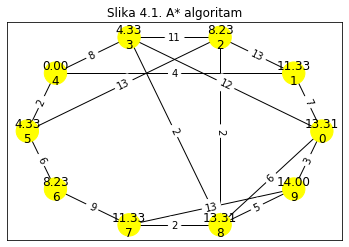

In [26]:
generiraj_novi_graf_A_star()

# funkcija za ispis
ispisi_output_A_star()

U čvoru su zapisane vrijednosti heuristike i indeks čvora.<br>
Algoritam je optimalan uz uvjet da je $h$ dopustiva. Velika prostorna složenost može biti razlog zašto bi se za neke probleme koristio neki drugi algoritam.

In [27]:
red_vrijednosti = ['A*','Da', 'Da', 
                '$\mathcal{O}(|V|) = \mathcal{O}(b^{d+1})$', 
                '$\mathcal{O}(|E|) = \mathcal{O}(b^{d+1})$']

# dodajemo red u tablicu
red = pd.Series(red_vrijednosti, index=tablica_svojstava_algoritama.columns)
tablica_svojstava_algoritama = tablica_svojstava_algoritama.append(red, ignore_index=True)

display(tablica_svojstava_algoritama)

,Algoritam,Optimalnost,Potpunost,Prostorna složenost,Vremenska složenost
0,BFS,Da,Da,$\mathcal{O}(|V|) = \mathcal{O}(b^{d+1})$,$\mathcal{O}(|V|+|E|) = \mathcal{O}(b^{d+1})$
1,DFS,Ne,Ne,$\mathcal{O}(|V|) = \mathcal{O}(bm)$,$\mathcal{O}(|V|+|E|) = \mathcal{O}(b^{m})$
2,Dijkstra,Da,Da,$\mathcal{O}(|V^2|)$,$\mathcal{O}(|E|+|V|\log|V|) $
3,A*,Da,Da,$\mathcal{O}(|V|) = \mathcal{O}(b^{d+1})$,$\mathcal{O}(|E|) = \mathcal{O}(b^{d+1})$


Za kraj pogledajmo usporedbu *Dijkstrinog* i *$A^*$ algoritma*.

<div style="text-align: center;">
    <div style="float:left; padding:10px;"> 
        <img src="https://upload.wikimedia.org/wikipedia/commons/2/23/Dijkstras_progress_animation.gif",
             width=300, height=200>
        <em>Animacija 4.2. Dijkstrin algoritam </em>
    </div>
    <div style="float:left; padding:10px;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/5/5d/Astar_progress_animation.gif",
             width=300, height=200>
        <em>Animacija 4.3. A* algoritam </em>
    </div>
</div>


http://theory.stanford.edu/~amitp/GameProgramming/Heuristics.html#S7
http://web.studenti.math.pmf.unizg.hr/~fniksic/files/maturalni.pdf
https://repozitorij.pmf.unizg.hr/islandora/object/pmf%3A1438/datastream/PDF/view
http://wiki.xfer.hr/eulerova_staza/